In [170]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt

In [171]:
with open('homebrew_analytics.json') as f:
    data = json.load(f)
    
df = pd.json_normalize(data)
df.columns = df.columns.str.replace('.','_')

df.head(3)

,name,desc,installs_on_request_30d,installs_on_request_90d,installs_on_request_365d,installs_30d,installs_90d,installs_365d
0,a2ps,Any-to-PostScript filter,116,310,1133,116,311,1141
1,a52dec,Library for decoding ATSC A/52 streams (AKA 'A...,28,85,355,45,160,612
2,aacgain,AAC-supporting version of mp3gain,47,132,541,46,131,546


In [344]:
df_video = df.loc[df['desc'].str.contains('video')].sort_values(by='installs_30d')

col_sum = df_video['installs_30d'].sum()
df_video['pct'] = df_video['installs_30d'].apply(lambda x: x/col_sum * 100)
df_video.head(2)

,name,desc,installs_on_request_30d,installs_on_request_90d,installs_on_request_365d,installs_30d,installs_90d,installs_365d,pct
919,dirac,General-purpose video codec aimed at a range o...,1,7,38,1,7,43,0.000194
4610,vcdimager,(Super) video CD authoring solution,1,5,55,1,6,64,0.000194


In [345]:
other_row = df_video[df_video['pct'] < 1].sum()
other_row[['name','desc']] = ['other','n/a']

df_video_simplified = df_video.loc[df_video['pct'] >= 1]
df_video_simplified = df_video_simplified.append(other_row, ignore_index=True)

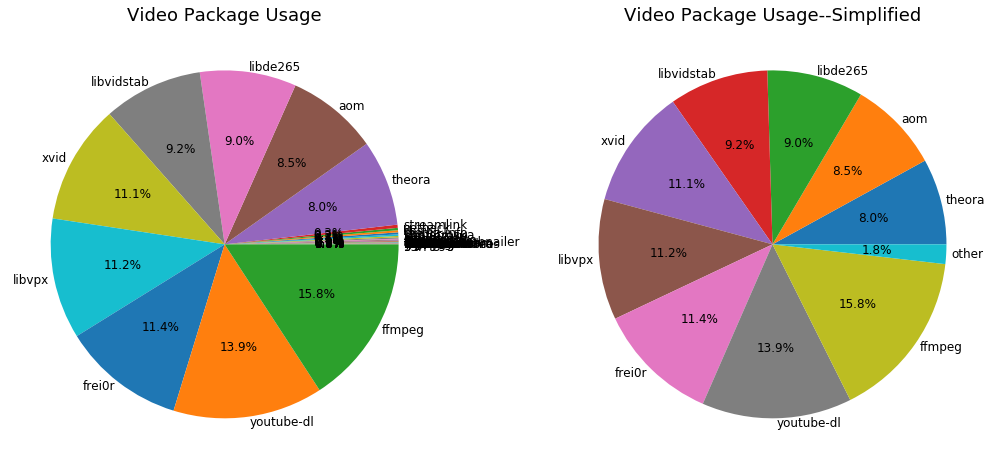

In [346]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
ax[0].pie(
    df_video['installs_30d'], 
    labels = df_video.name,
    autopct = '%.1f%%',
    radius = 1,
    labeldistance=1.03,
    textprops=dict(
        size=12
    )
)
ax[0].set_title('Video Package Usage',fontdict=dict(size=18))

ax[1].pie(
    df_video_simplified['installs_30d'], 
    labels = df_video_simplified.name,
    autopct = '%.1f%%',
    radius = 1,
    labeldistance=1.03,
    textprops=dict(
        size=12
    )
)
ax[1].set_title('Video Package Usage--Simplified',fontdict=dict(size=18))

plt.show()

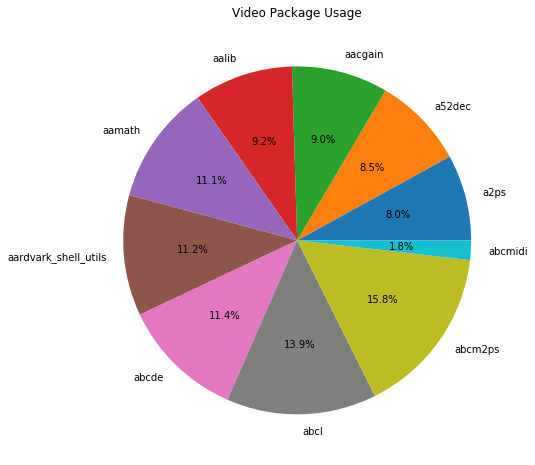

In [347]:
ax = df_video_simplified['installs_30d'].plot(
    kind='pie',
    labels=df.name,
    autopct='%.1f%%',
    figsize=(8,8),
    title='Video Package Usage',
)
ax.set_ylabel(None)
plt.show()

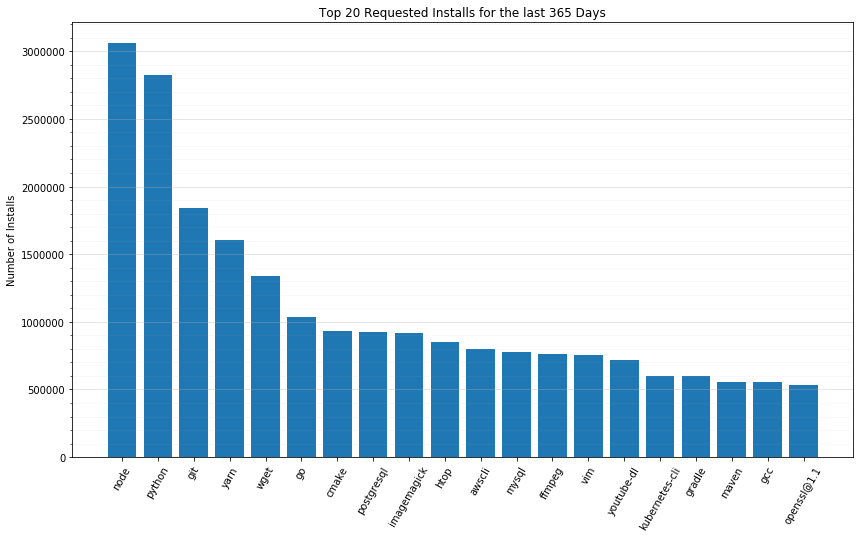

In [348]:
df_top20 = df.sort_values(by='installs_on_request_365d',ascending=False)[:20]

fig, ax = plt.subplots(figsize=(14,8))

ax.set_title('Top 20 Requested Installs for the last 365 Days')
ax.set_ylabel('Number of Installs')
ax.bar(
    x=np.arange(20)+.5,
    height=df_top20['installs_on_request_365d'],
    tick_label=df_top20['name'],
)
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.tick_params(axis='x',labelrotation=60)
ax.grid(axis='y', alpha=.4)
ax.grid(which='minor', alpha=.1)

plt.show()

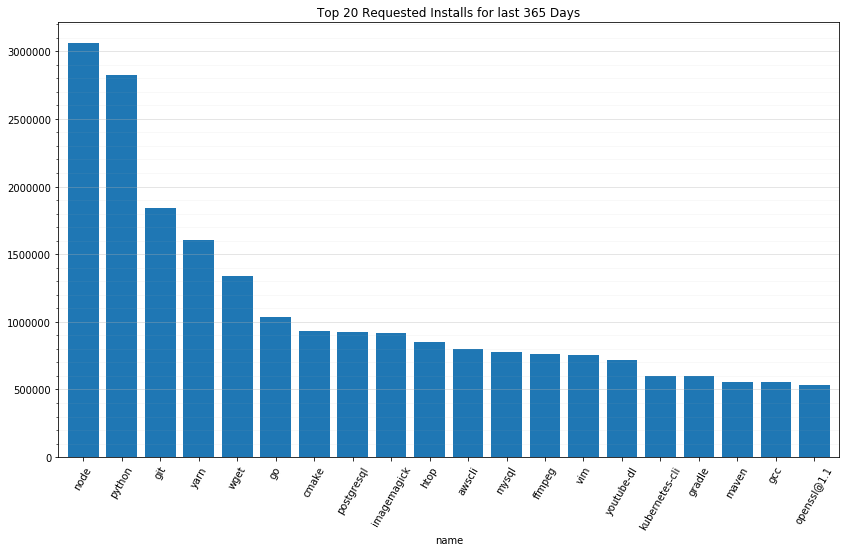

In [349]:
ax = df_top20.set_index('name')['installs_on_request_365d'].plot(
    kind='bar', 
    x=df_top20['name'],
    width=.8,
    title='Top 20 Requested Installs for last 365 Days',
    figsize=(14,8)
)
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.tick_params(axis='x',labelrotation=60)
ax.grid(axis='y', alpha=.4)
ax.grid(which='minor', alpha=.1)

plt.show()